# Welcome to our first Python lab: Getting to know your data

 This notebook will go through a set of important tasks that need to be carried out prior to data preprocessing step which are about getting to know your data. 
 knowledge about your data is useful for data preprocessing, this involves:
* having a closer look at the different attributes that make-up your data, their types and their values. 
* checking the distribution of your data: normal istribution (symmetric, Gaussian) or skewed
* having an idea about the central tendency of the data distribution and the dispersion (spread) of attribute data using the basic statistical description (mean, standard deviation, ...)




In [2]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

* Pandas will be used to handle the dataframe; 
* numpy will be used to calculate a few key statistics such as median and standard deviation as well as to draw random samples from the dataset, 
* matplotlib.pyplot andseaborn will be used together to generate the plot
* scipy will be used for the mathematical calculation of the normal statistics.


### Exploration and visualization of Data

In [10]:
## reading of the CSV file with tabulation separator source of the dataset: http://jse.amstat.org/datasets/normtemp.dat.txt

df = pd.read_csv("normtemp.csv",sep="\s+",header=0)
df.head()


,temp,gender,heartBeat
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [8]:
## How many instances the dataset contains?
print(len(df))

130


In [11]:
## what are the attributes that make up the data?
df.columns

Index(['temp', 'gender', 'heartBeat'], dtype='object')

In [12]:
## display of only temperature column
df.temp

0       96.3
1       96.7
2       96.9
3       97.0
4       97.1
       ...  
125     99.3
126     99.4
127     99.9
128    100.0
129    100.8
Name: temp, Length: 130, dtype: float64

In [13]:
## display of only temperature reading for women
df[df.gender==2].temp

65      96.4
66      96.7
67      96.8
68      97.2
69      97.2
       ...  
125     99.3
126     99.4
127     99.9
128    100.0
129    100.8
Name: temp, Length: 65, dtype: float64

In [14]:
## display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       130 non-null    float64
 1   gender     130 non-null    int64  
 2   heartBeat  130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


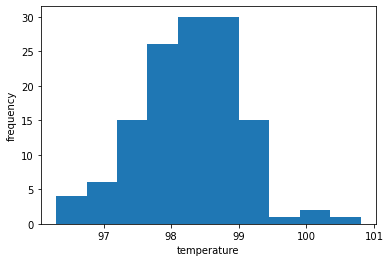

In [15]:
## histogram based visualization
## for the attribute temperature
plt.hist(df['temp'])
plt.ylabel('frequency')
plt.xlabel('temperature')
plt.show()

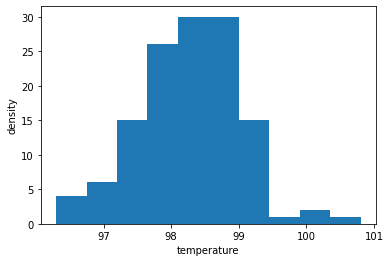

In [16]:
## histogram based visualization
## for the attribute temperature (using density instead of frequency)
plt.hist(df['temp'])
plt.ylabel('density')
plt.xlabel('temperature')
plt.show()

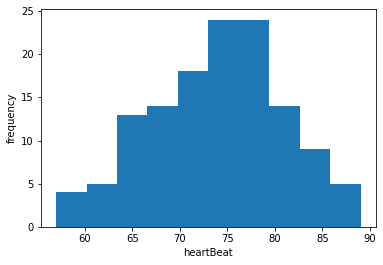

In [18]:
## histogram based visualization
## for the attribute heart beat
plt.hist(df['heartBeat'])
plt.ylabel('frequency')
plt.xlabel('heartBeat')
plt.show()

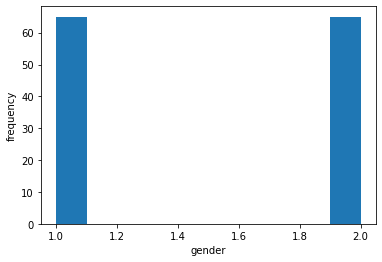

In [19]:
## histogram based visualization
## for the attribute gender
plt.hist(df['gender'])
plt.ylabel('frequency')
plt.xlabel('gender')
plt.show()

<AxesSubplot:xlabel='temp'>

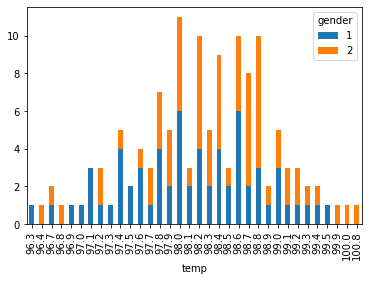

In [20]:
## histogram based visualization
## bidimensional representation: temperature and gender
table = pd.crosstab(df.temp,df.gender)
table.plot.bar(stacked=True)

In [ ]:
## Studying the central tendency and the dispersion of the data 


### Five-number Summary (Tukey five-number summary because it was recommended by John Tukey)
* The five-number summary can be calculated for a data sample with any distribution.
* We can calculate percentile values in Python using the percentile() NumPy function. 
* We can use this function to calculate the Q1 , Q2 (median), and Q3 quartile values. 
* The function takes both an array of observations and a floating point value (0,25; 0,5 and 0,75) to specify the percentile to calculate in the range of 0 to 100.
* The NumPy functions min() and max() can be used to return the smallest and largest values in the data sample.

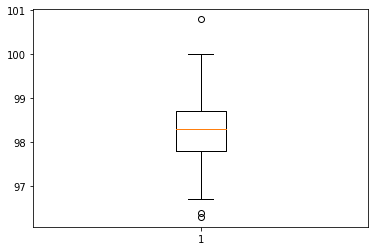

In [31]:
## Five-Number Summary
# calculate quartiles

#np.percentile(df,50)
np.percentile(df.temp,25)
#np.percentile(df,75)

# calculate min/max
np.max(df.temp)
np.min(df)
# print 5-number summary

plt.boxplot(df.temp)
plt.show()

### QQ plot
Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.
* We can develop a QQ plot in Python using the qqplot() statsmodels function. 
* The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. 
* We can draw the standardized line by setting the ‘line‘ argument to ‘s‘.

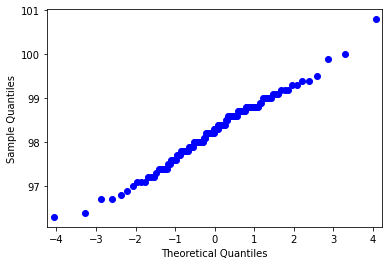

In [35]:
# q-q plot
import statsmodels.api as sm
sm.qqplot(df.temp, stats.t, distargs=(4,))
plt.show()

### Statistical Normality Tests
* There are also many statistical tests that we can use to quantify whether a sample of data looks as it was drawn from a Gaussian distribution.
* Each test makes different assumptions and considers different aspects of the data.
* Returned results of such tests:
    * Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
    * p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution (H0).
* In the SciPy implementation of these tests, you can interpret the p value as follows.
    * p <= alpha: reject H0, not normal.
    * p > alpha: fail to reject H0, normal.
         * A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.
* Many normality tests exist in the literature, the three commonly used ones are: 
    * Shapiro-wil test (named for Samuel Shapiro and Martin Wilk and available via the  shapiro() SciPy function )
    * D’Agostino’s K^2 Test (available via the normaltest() SciPy function )
    * Anderson-Darling Test (available via the anderson() SciPy function)

In [32]:
## do we have a normal distribtion for temperature data? 
print(stats.normaltest(df.temp))

NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212)
